In [1]:
import pandas as pd
import numpy as np

In [82]:
# Classifiers importation
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import neural_network
from sklearn.naive_bayes import BernoulliNB

# Others
import seaborn as sns
from sklearn import linear_model, metrics, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

In [79]:
#To save the final trained model
def save_model(clf, name):
    filename = 'trained_'+name+'.sav'
    joblib.dump(clf, filename)
    return filename

## Authors ##

In [5]:
filename = './clean_newauthors.csv'
df_authors = pd.read_csv(filename, sep=",")
df_authors.drop('Unnamed: 0',axis=1,inplace=True)

Mirem Ratio de zeros que ens donarà una idea de la accuracy que hauriem de treure:

In [6]:
df_authors.head()

,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,2.4,3.929377,15.5,32.022648,0.0,0.0,19645.0,949.0,662.0,12334.0,55829.0
1,0.2,0.600000,0.8,0.979796,1.0,0.0,4221.0,281.0,340.0,587.0,13650.0
2,17.9,13.626812,37.2,40.931162,21.0,10.0,1133925.0,1.0,9745.0,16.0,65228.0
3,0.4,0.489898,1.7,3.796051,0.0,0.0,5386.0,3861.0,304.0,15325.0,85493.0
4,2.3,5.216321,3.4,6.545227,0.0,0.0,1072.0,433.0,101.0,899.0,19893.0


In [7]:
zero_ratio_FC = df_authors.loc[df_authors.index[df_authors['FC'] > 0]].shape[0]/df_authors.shape[0]
zero_ratio_RT = df_authors.loc[df_authors.index[df_authors['RT'] > 0]].shape[0]/df_authors.shape[0]

print('Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més')
print(1-zero_ratio_FC, 1-zero_ratio_RT)

Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més
0.3873002523128679 0.6455004205214465


Distribució de les dades en porcentatge:

total sum: 2378


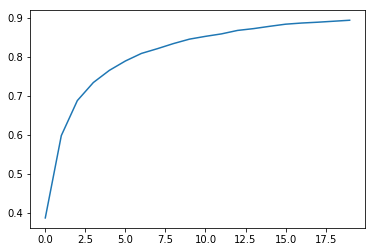

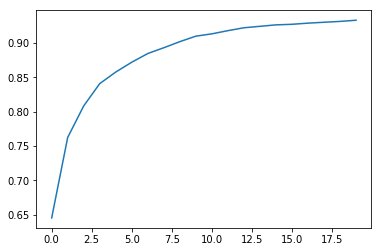

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

N = 20
s1, s2 = 0, 0
p1, p2 = [], []
x = range(N)
tsum = df_authors.shape[0]
print('total sum: %s' % tsum)

for i in range(N):
    s1 = s1 + df_authors[df_authors['FC']==i].shape[0]
    s2 = s2 + df_authors[df_authors['RT']==i].shape[0]
    p1.append(s1/tsum)
    p2.append(s2/tsum)
    #print(i,s1,s2)

plt.plot(x, p1)
plt.show()
plt.plot(x, p2)
plt.show()

    FC -> class'0': [0,15)   class'1': [15,50]   class'2': [50,inf)
    RT -> class'0': [0,5)   class'1': [5,25]   class'2': [25,inf)

In [9]:
a = np.zeros(df_authors.shape[0])
idx = np.where(df_authors['FC'].values < 15)[0]
print(idx.shape)
a[idx] = 0
idx = np.where((df_authors['FC'].values >= 15) & (df_authors['FC'].values <= 50))[0]
print(idx.shape)
a[idx] = 1
idx = np.where(df_authors['FC'].values > 50)[0]
print(idx.shape)
a[idx] = 2  

df_authors['FC_class'] = a

b = np.zeros(df_authors.shape[0])
idx = np.where(df_authors['RT'].values < 5)[0]
print(idx.shape)
b[idx] = 0
idx = np.where((df_authors['RT'].values >= 5) & (df_authors['RT'].values <= 25))[0]
print(idx.shape)
b[idx] = 1
idx = np.where(df_authors['RT'].values > 25)[0]
print(idx.shape)
b[idx] = 2  

df_authors['RT_class'] = b

(2087,)
(126,)
(165,)
(2039,)
(198,)
(141,)


In [10]:
df_authors.head()

,RT_l10,sd_RT,FC_l10,sd_FC,FC,RT,followers_count,friends_count,listed_count,favourites_count,statuses_count,FC_class,RT_class
0,2.4,3.929377,15.5,32.022648,0.0,0.0,19645.0,949.0,662.0,12334.0,55829.0,0.0,0.0
1,0.2,0.600000,0.8,0.979796,1.0,0.0,4221.0,281.0,340.0,587.0,13650.0,0.0,0.0
2,17.9,13.626812,37.2,40.931162,21.0,10.0,1133925.0,1.0,9745.0,16.0,65228.0,1.0,1.0
3,0.4,0.489898,1.7,3.796051,0.0,0.0,5386.0,3861.0,304.0,15325.0,85493.0,0.0,0.0
4,2.3,5.216321,3.4,6.545227,0.0,0.0,1072.0,433.0,101.0,899.0,19893.0,0.0,0.0


Comprovem que les classes estiguin ben definidies:

In [31]:
#FC
print(min(df_authors['FC'][df_authors['FC_class']==0]),max(df_authors['FC'][df_authors['FC_class']==0]))
print(min(df_authors['FC'][df_authors['FC_class']==1]),max(df_authors['FC'][df_authors['FC_class']==1]))
print(min(df_authors['FC'][df_authors['FC_class']==2]),max(df_authors['FC'][df_authors['FC_class']==2]))
#RT
print(min(df_authors['RT'][df_authors['RT_class']==0]),max(df_authors['RT'][df_authors['RT_class']==0]))
print(min(df_authors['RT'][df_authors['RT_class']==1]),max(df_authors['RT'][df_authors['RT_class']==1]))
print(min(df_authors['RT'][df_authors['RT_class']==2]),max(df_authors['RT'][df_authors['RT_class']==2]))

0.0 14.0
15.0 50.0
53.0 75698.0
0.0 4.0
5.0 25.0
27.0 12661.0


Classificadors per classe '0', '1' o '2' per FC: 

In [72]:
classifiers = [ linear_model.LogisticRegression(class_weight={0:1,1:1,2:3}),
                neural_network.MLPClassifier(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=0.01, class_weight={0:1,1:1,2:5}, probability=True),
                DecisionTreeClassifier(class_weight={0:1,1:1,2:5}),
                RandomForestClassifier(class_weight={0:1,1:1,2:5}),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [74]:
X = df_authors[['RT_l10', 'sd_RT', 'FC_l10', 'sd_FC', 'friends_count', 'followers_count']]
Y = df_authors['FC_class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=10)

for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__
    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, 100*acc)
    #print (metrics.confusion_matrix(yhat,y_test))

LogisticRegression 90.61624649859944
MLPClassifier 71.84873949579831
KNeighborsClassifier 89.35574229691878
SVC 86.5546218487395
DecisionTreeClassifier 89.35574229691878
RandomForestClassifier 92.01680672268907
AdaBoostClassifier 91.03641456582633
GradientBoostingClassifier 91.87675070028011


Since the LogisticRegression have the largest accuaracy we will keep the parameters of this model to allocate the users of the application to each class regarding the FC. Now we use the whole Dataset to train the classifier.

In [109]:
FC_class = linear_model.LogisticRegression(class_weight={0:1,1:1,2:40})
FC_class.fit(X,Y)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 1, 2: 40}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [111]:
save_model(FC_class, 'groupsFC_Log')

'trained_groupsFC_Log.sav'

Classificadors per classe '0', '1', '2' per RT: 

In [112]:
classifiers = [ linear_model.LogisticRegression(class_weight={0:1,1:1,2:40}),
                neural_network.MLPClassifier(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, class_weight={0:1,1:1,2:40}, probability=True),
                DecisionTreeClassifier(class_weight={0:1,1:1,2:40}),
                RandomForestClassifier(class_weight={0:1,1:1,2:40}),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [113]:
X = df_authors[['RT_l10', 'sd_RT', 'FC_l10', 'sd_FC', 'friends_count', 'followers_count', 'listed_count', 'favourites_count', 'statuses_count']]
Y = df_authors['RT_class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=3)

for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    #print (metrics.confusion_matrix(yhat,y_test))

LogisticRegression 0.8753501400560224
MLPClassifier 0.8319327731092437
KNeighborsClassifier 0.8697478991596639
SVC 0.8641456582633054
DecisionTreeClassifier 0.8571428571428571
RandomForestClassifier 0.8921568627450981
AdaBoostClassifier 0.8851540616246498
GradientBoostingClassifier 0.8921568627450981


Since the LogisticRegression have the largest accuaracy we will keep the parameters of this model to allocate the users of the application to each class regarding the RT. Now we use the whole Dataset to train the classifier.

In [114]:
RT_class =  linear_model.LogisticRegression(class_weight={0:1,1:1,2:40})
RT_class.fit(X,Y)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 1, 2: 40}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [115]:
save_model(FC_class, 'groupsRT_Log')

'trained_groupsRT_Log.sav'

Ara que ja tenim definides les classes de FC i RT farem un model per cada classe, en total 6, 3 per FC i 3 per RT.

## Tweets Dataset ##

In [97]:
import ast
import re #regular expressions
import unidecode as udc
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from unicodedata import normalize

In [98]:
#X['location'] = [ast.literal_eval(data['j_user'][i])['location'] for i in range(X.shape[0])]
filename = './tweet.csv'
df_tweets = pd.read_csv(filename, sep=",")

In [99]:
df_tweets = df_tweets[['Tweet','FC','RT']]
df_tweets.head()

,Tweet,FC,RT
0,Desde el #FCJumilla damos nuestra más sincera ...,18,4
1,Me estoy volviendo loca hasta por cada una de ...,0,0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,4,2
3,📹 | El vestuario del #FCJumilla en La Condomin...,21,6
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,0,0


Check number of zeros in  'FC' and 'RT' of our sample:

In [100]:
zero_ratio_FC = df_tweets.loc[df_tweets.index[df_tweets['FC'] > 0]].shape[0]/df_tweets.shape[0]
zero_ratio_RT = df_tweets.loc[df_tweets.index[df_tweets['RT'] > 0]].shape[0]/df_tweets.shape[0]

print('Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més')
print(1-zero_ratio_FC, 1-zero_ratio_RT)

Una accuarcy semblant a aquest ratios seria dolenta, ha de ser molt més
0.40010965246261154 0.6620267430172703


In [101]:
c = np.zeros(df_tweets.shape[0])
idx = np.where(df_tweets['FC'].values < 15)[0]
c[idx] = 0
idx = np.where((df_tweets['FC'].values >= 15) & (df_tweets['FC'].values <= 50))[0]
c[idx] = 1
idx = np.where(df_tweets['FC'].values > 50)[0]
c[idx] = 2  

df_tweets['FC_class'] = c

d = np.zeros(df_tweets.shape[0])
idx = np.where(df_tweets['RT'].values < 5)[0]
d[idx] = 0
idx = np.where((df_tweets['RT'].values >= 5) & (df_tweets['RT'].values <= 25))[0]
d[idx] = 1
idx = np.where(df_tweets['RT'].values > 25)[0]
d[idx] = 2  

df_tweets['RT_class'] = d

In [102]:
df_tweets.head()

,Tweet,FC,RT,FC_class,RT_class
0,Desde el #FCJumilla damos nuestra más sincera ...,18,4,1.0,0.0
1,Me estoy volviendo loca hasta por cada una de ...,0,0,0.0,0.0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,4,2,0.0,0.0
3,📹 | El vestuario del #FCJumilla en La Condomin...,21,6,1.0,1.0
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,0,0,0.0,0.0


Comensem pels models definits com a classe'1' en FC i RT. Primer dividim per intervals peruqè predir exactament un número és imporssible. En total N intervals. A mesura que els FC i els RT augmenten també augmenta l'amplada del interval:

In [103]:
class segmenta():
    
    def __init__(self):
        self.intervals = {}
    
    def transform(self,y):
        k, z = 0, 0
        for a, b in [[15,5],
                     [25,10],
                     [50,25],
                     [100,50],
                     [1000,900],
                     [10000,4500],
                     [50000,10000]]: 
            for i in np.arange(z,a,b):
                self.intervals[k] = [i,i+b-1]
                k+=1
            z = a
        self.intervals[k] = [50000,99999999]

        C = np.zeros(len(y))
        for j in self.intervals:
            c = self.intervals[j]
            idx = np.where(np.logical_and(y>=c[0],y<=c[1]))[0]
            C[idx] = j

        return C

In [104]:
seg = segmenta()
df_tweets['FC_int'] = seg.transform(df_tweets['FC'])
df_tweets['RT_int'] = seg.transform(df_tweets['RT'])
print(seg.intervals)
df_tweets.head()

{0: [0, 4], 1: [5, 9], 2: [10, 14], 3: [15, 24], 4: [25, 49], 5: [50, 99], 6: [100, 999], 7: [1000, 5499], 8: [5500, 9999], 9: [10000, 19999], 10: [20000, 29999], 11: [30000, 39999], 12: [40000, 49999], 13: [50000, 99999999]}


,Tweet,FC,RT,FC_class,RT_class,FC_int,RT_int
0,Desde el #FCJumilla damos nuestra más sincera ...,18,4,1.0,0.0,3.0,0.0
1,Me estoy volviendo loca hasta por cada una de ...,0,0,0.0,0.0,0.0,0.0
2,🏟 | El #FCJumilla ya está en La Condomina ⚽️...,4,2,0.0,0.0,0.0,0.0
3,📹 | El vestuario del #FCJumilla en La Condomin...,21,6,1.0,1.0,3.0,1.0
4,📑 Jornada 6 | El colegiado andaluz Guzmán Mans...,0,0,0.0,0.0,0.0,0.0


Separem la BBDD en 4 en funció de la classe assignada previament amb els 2 models d'authors (classe '0' i '1' a FC i RT):

In [105]:
FC_C0 = df_tweets[df_tweets['FC_class']==0] 
FC_C1 = df_tweets[df_tweets['FC_class']==1]
FC_C2 = df_tweets[df_tweets['FC_class']==2]

RT_C0 = df_tweets[df_tweets['RT_class']==0] 
RT_C1 = df_tweets[df_tweets['RT_class']==1] 
RT_C2 = df_tweets[df_tweets['RT_class']==2] 

In [106]:
print(FC_C0.shape, FC_C1.shape, FC_C2.shape, RT_C0.shape, RT_C1.shape, RT_C2.shape)

(29089, 7) (1656, 7) (2086, 7) (28475, 7) (2569, 7) (1787, 7)


Token, analyze, ...

Script Núria en el que es treuen les paraules que no aporten informació com conectors, articles, ... per utilitzaro com a stop words en el 'CountVectorizer':

In [107]:
filename = './eliminar_paraules.xlsx'
elim = pd.read_excel(filename, header=None)

y=elim[0]
for i in range(len(elim)):
    y[i] = re.sub(
            r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
            normalize( "NFD", y[i]), 0, re.I)
y = y.tolist()

### Model FC_C0: ###

### Model FC_C1: ###

In [108]:
# Com estan distribuides les dades per els intervals creats
for i in range(len(seg.intervals)):
    idx = np.where(FC_C1['FC_int']==i)[0]
    print(i, seg.intervals[i], idx.shape[0])

0 [0, 4] 0
1 [5, 9] 0
2 [10, 14] 0
3 [15, 24] 885
4 [25, 49] 754
5 [50, 99] 17
6 [100, 999] 0
7 [1000, 5499] 0
8 [5500, 9999] 0
9 [10000, 19999] 0
10 [20000, 29999] 0
11 [30000, 39999] 0
12 [40000, 49999] 0
13 [50000, 99999999] 0


In [34]:
vect_FC_C1 = CountVectorizer(min_df=0.0001, stop_words=y, strip_accents='unicode') # Tweets stop_words=y

X = FC_C1['Tweet']
Y = FC_C1['FC_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_FC_C1.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_FC_C1.transform(X_test).todense()
y_test = y_test.values

In [27]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

(1159, 6478)
(497, 6478)
0.999137187230371
0.9859154929577465


In [28]:
classifiers = [ AdaBoostClassifier(),
                neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                GradientBoostingClassifier(),
                #SVC(kernel="rbf", C=1, probability=True)
              ]

In [29]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    #print (metrics.confusion_matrix(yhat,y_test))

AdaBoostClassifier 0.5352112676056338
MLPClassifier 0.48088531187122735
LogisticRegression 0.4969818913480885
KNeighborsClassifier 0.5392354124748491
DecisionTreeClassifier 0.48490945674044267
RandomForestClassifier 0.5331991951710262
GradientBoostingClassifier 0.4949698189134809


In [39]:
vect_FC_C1 = CountVectorizer(min_df=0.0001, stop_words=y, strip_accents='unicode') # Tweets stop_words=y

#Process and convert data 
x = vect_FC_C1.fit_transform(X).todense()

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(x[np.where(x.sum(axis=1)>0)].shape[1]/x.shape[0])
print(x.shape)

FC_C1_tweet = AdaBoostClassifier()
FC_C1_tweet.fit(x,Y)

0.9993961352657005
(1656, 8593)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

For prediction we will do the following:

    1) x = vect_FC_C1.transform(X).todense(), where X is the dataframe with the tweet that will be transformed to binary.
    
    2) FC_C1_tweet.predict(x), where x comes form the above 1) and it will provide the prediction.

INTERVAL DE CONFIANÇA FC_C1:

In [ ]:
# ITERVAL DE CONFIANÇA
mu = ###
sd = ###
x = vect_FC_C1.transform(X).todense()
pred = FC_C1_tweet.predict(x)

k = seg.transform(pd.DataFrame([mu]))[0]

if (pred > mu + sd*1.96) or (pred < mu - sd*1.96):
    pred = seg.intervals[k]

### Model FC_C2: ###

In [40]:
# Com estan distribuides les dades per els intervals creats
for i in range(len(seg.intervals)):
    idx = np.where(FC_C2['FC_int']==i)[0]
    print(i, seg.intervals[i], idx.shape[0])

0 [0, 4] 0
1 [5, 9] 0
2 [10, 14] 0
3 [15, 24] 0
4 [25, 49] 0
5 [50, 99] 419
6 [100, 999] 932
7 [1000, 5499] 493
8 [5500, 9999] 96
9 [10000, 19999] 85
10 [20000, 29999] 27
11 [30000, 39999] 17
12 [40000, 49999] 10
13 [50000, 99999999] 7


In [41]:
vect_FC_C2 = CountVectorizer(min_df=0.0005, stop_words=y, strip_accents='unicode') # Tweets stop_words=y

X = FC_C2['Tweet']
Y = FC_C2['FC_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_FC_C2.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_FC_C2.transform(X_test).todense()
y_test = y_test.values

In [42]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

(1460, 6874)
(626, 6874)
0.9986301369863013
0.987220447284345


In [43]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                #SVC(kernel="rbf", C=1, probability=True)
              ]

In [44]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    #print (metrics.confusion_matrix(yhat,y_test))

MLPClassifier 0.49201277955271566
LogisticRegression 0.5031948881789138
KNeighborsClassifier 0.3610223642172524
DecisionTreeClassifier 0.48083067092651754
RandomForestClassifier 0.48562300319488816
AdaBoostClassifier 0.4984025559105431
GradientBoostingClassifier 0.4936102236421725


In [46]:
vect_FC_C2 = CountVectorizer(min_df=0.0001, stop_words=y, strip_accents='unicode') # Tweets stop_words=y

#Process and convert data 
x = vect_FC_C2.fit_transform(X).todense()

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(x[np.where(x.sum(axis=1)>0)].shape[1]/x.shape[0])
print(x.shape)

FC_C2_tweet = AdaBoostClassifier()
FC_C2_tweet.fit(x,Y)

0.9990412272291467
(2086, 8994)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

For prediction we will do the following:

    1) x = vect_FC_C2.transform(X).todense(), where X is the dataframe with the tweet that will be transformed to binary.
    
    2) FC_C2_tweet.predict(x), where x comes form the above 1) and it will provide the prediction.

INTERVAL DE CONFIANÇA FC_C2:

In [ ]:
mu = ###
sd = ###
x = vect_FC_C2.transform(X).todense()
pred = FC_C2_tweet.predict(x)

k = seg.transform(pd.DataFrame([mu]))[0]

if (pred > mu + sd*1.96) or (pred < mu - sd*1.96):
    pred = seg.intervals[k]

### Model RT_C0: ###

### Model RT_C1: ###

In [62]:
# Com estan distribuides les dades per els intervals creats
for i in range(len(seg.intervals)):
    idx = np.where(RT_C1['FC_int']==i)[0]
    print(i, seg.intervals[i], idx.shape[0])

0 [0, 4] 228
1 [5, 9] 460
2 [10, 14] 446
3 [15, 24] 525
4 [25, 49] 475
5 [50, 99] 246
6 [100, 999] 189
7 [1000, 5499] 0
8 [5500, 9999] 0
9 [10000, 19999] 0
10 [20000, 29999] 0
11 [30000, 39999] 0
12 [40000, 49999] 0
13 [50000, 99999999] 0


In [71]:
vect_RT_C1 = CountVectorizer(min_df=0.0002, stop_words=y, strip_accents='unicode') # Tweets 

In [ ]:
X = RT_C1['Tweet']
Y = RT_C1['RT_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_RT_C1.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_RT_C1.transform(X_test).todense()
y_test = y_test.values

In [65]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

(1798, 9520)
(771, 9520)
0.9988876529477196
0.9987029831387808


In [68]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                #SVC(kernel="rbf", C=1, probability=True)
              ]

In [ ]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

In [ ]:
vect_RT_C1 = CountVectorizer(min_df=0.0001, stop_words=y, strip_accents='unicode') # Tweets stop_words=y

#Process and convert data 
x = vect_RT_C1.fit_transform(X).todense()

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(x[np.where(x.sum(axis=1)>0)].shape[1]/x.shape[0])
print(x.shape)

RT_C1_tweet = AdaBoostClassifier()
RT_C1_tweet.fit(x,Y)

For prediction we will do the following:

    1) x = vect_RT_C1.transform(X).todense(), where X is the dataframe with the tweet that will be transformed to binary.
    
    2) RT_C1_tweet.predict(x), where x comes form the above 1) and it will provide the prediction.

INTERVAL DE CONFIANÇA RT_C1:

In [ ]:
mu = ###
sd = ###
x = vect_RT_C2.transform(X).todense()
pred = RT_C2_tweet.predict(x)

k = seg.transform(pd.DataFrame([mu]))[0]

if (pred > mu + sd*1.96) or (pred < mu - sd*1.96):
    pred = seg.intervals[k]

### Model RT_C2: ###

In [76]:
# Com estan distribuides les dades per els intervals creats
for i in range(len(seg.intervals)):
    idx = np.where(RT_C2['FC_int']==i)[0]
    print(i, seg.intervals[i], idx.shape[0])

0 [0, 4] 0
1 [5, 9] 2
2 [10, 14] 9
3 [15, 24] 35
4 [25, 49] 125
5 [50, 99] 150
6 [100, 999] 731
7 [1000, 5499] 493
8 [5500, 9999] 96
9 [10000, 19999] 85
10 [20000, 29999] 27
11 [30000, 39999] 17
12 [40000, 49999] 10
13 [50000, 99999999] 7


In [77]:
vect_RT_C2 = CountVectorizer(min_df=0.0002, stop_words=y, strip_accents='unicode') # Tweets 

In [ ]:
x = RT_C2['Tweet']
y = RT_C2['RT_int']

X_train, X_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)

#Process and convert data 
X_train = vect_RT_C2.fit_transform(X_train).todense()
y_train = y_train.values

X_test = vect_RT_C2.transform(X_test).todense()
y_test = y_test.values

In [ ]:
print(X_train.shape)
print(X_test.shape)

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(X_train[np.where(X_train.sum(axis=1)>0)].shape[1]/X_train.shape[0])
print(X_test[np.where(X_test.sum(axis=1)>0)].shape[1]/X_test.shape[0])

In [ ]:
classifiers = [ neural_network.MLPClassifier(),
                linear_model.LogisticRegression(),
                KNeighborsClassifier(3),
                SVC(kernel="rbf", C=1, probability=True),
                DecisionTreeClassifier(),
                RandomForestClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
              ]

In [ ]:
for clf in classifiers:

    clf.fit(X_train,y_train)
    name = clf.__class__.__name__

    yhat = clf.predict(X_test).reshape(-1,1)
    acc = metrics.accuracy_score(y_test, yhat)  
    print(name, acc)
    yhat_prob = clf.predict_proba(X_test)

In [ ]:
vect_RT_C2 = CountVectorizer(min_df=0.0001, stop_words=y, strip_accents='unicode') # Tweets stop_words=y

#Process and convert data 
x = vect_RT_C2.fit_transform(X).todense()

# Percentatge número de files amb tot zeros despres de natejar la bbdd (X_train i X_test)
print(x[np.where(x.sum(axis=1)>0)].shape[1]/x.shape[0])
print(x.shape)

RT_C2_tweet = AdaBoostClassifier()
RT_C2_tweet.fit(x,Y)

For prediction we will do the following:

    1) x = vect_RT_C2.transform(X).todense(), where X is the dataframe with the tweet that will be transformed to binary.
    
    2) RT_C2_tweet.predict(x), where x comes form the above 1) and it will provide the prediction.

INTERVAL DE CONFIANÇA RT_C2:

In [ ]:
mu = ###
sd = ###
x = vect_RT_C2.transform(X).todense()
pred = RT_C2_tweet.predict(x)

k = seg.transform(pd.DataFrame([mu]))[0]

if (pred > mu + sd*1.96) or (pred < mu - sd*1.96):
    pred = seg.intervals[k]